<a href="https://colab.research.google.com/github/muskangurain/AIMLMonth2023/blob/main/Image_Classification_RESNET50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# daatset api
!kaggle competitions download -c cifar-10

100% 714M/715M [00:05<00:00, 79.8MB/s]
100% 715M/715M [00:05<00:00, 148MB/s] 


In [4]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [7]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.6/100.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 429.9/429.9 kB 25.3 MB/s eta 0:00:00


In [8]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [9]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the Dependencies

In [10]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [11]:
filenames = os.listdir('/content/train')

In [12]:
type(filenames)

list

In [13]:
len(filenames)

50000

In [14]:
print(filenames[0:5])
print(filenames[-5:])

['31192.png', '21378.png', '29671.png', '25882.png', '38344.png']
['29878.png', '39424.png', '44391.png', '46053.png', '23911.png']


**Labels Processing**

In [15]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [16]:
labels_df.shape

(50000, 2)

In [17]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [18]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [19]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [20]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [21]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [22]:
labels_df['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [23]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [24]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


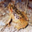

In [25]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

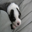

In [26]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [27]:
labels_df[labels_df['id'] == 45888]

,id,label
45887,45888,dog


In [28]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [29]:
id_list = list(labels_df['id'])

In [30]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [31]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [32]:
type(data)

list

In [33]:
len(data)

50000

In [34]:
type(data[0])

numpy.ndarray

In [35]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
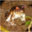

In [36]:
data[0]

In [37]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [38]:
type(X)

numpy.ndarray

In [39]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Train Test Split**

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [41]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [42]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [43]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]], dtype=uint8)
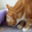

In [44]:
X_train[0]

**Building the Neural Network**

In [45]:
import tensorflow as tf
from tensorflow import keras

In [46]:
num_of_classes = 10

# setting up the layers of Neural Network
simple_cnn = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
# compile the neural network
simple_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [48]:
# training the neural network
simple_cnn.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20)

Epoch 1/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.2619 - loss: 2.0370 - val_acc: 0.3600 - val_loss: 1.8118
Epoch 2/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3525 - loss: 1.8116 - val_acc: 0.3450 - val_loss: 1.8215
Epoch 3/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3737 - loss: 1.7529 - val_acc: 0.3728 - val_loss: 1.7705
Epoch 4/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3841 - loss: 1.7169 - val_acc: 0.3722 - val_loss: 1.7330
Epoch 5/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3869 - loss: 1.7075 - val_acc: 0.3900 - val_loss: 1.6815
Epoch 6/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3986 - loss: 1.6888 - val_acc: 0.3930 - val_loss: 1.6785
Epoch 7/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.4103 - loss: 1.6586 - val_acc: 0.3940 - val_loss: 1.6757
Epoch 8/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.4055 - loss: 1.6629 - val_acc: 0.3955 - val_loss: 1.6751
Epoch 9/20
1125/1125 ━━━━━━━━━━━━━━━━━━━

In [49]:
from tensorflow.keras.datasets import cifar10

# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# normalize (important!)
x_train = x_train / 255.0
x_test = x_test / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [50]:
test_loss, test_acc = simple_cnn.evaluate(X_test_scaled, Y_test, verbose=1)
print("Test Accuracy:", test_acc * 100, "%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.4169 - loss: 1.6231
Test Accuracy: 42.07000136375427 %


In [51]:
y_pred = simple_cnn.predict(x_test)
y_pred_labels = y_pred.argmax(axis=1)     # convert probabilities → labels
y_true = y_test.flatten()                 # convert shape (10000,1) → (10000,)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [52]:
print(simple_cnn)



<Sequential name=sequential, built=True>


In [53]:
from sklearn.metrics import f1_score


f1_macro = f1_score(y_true, y_pred_labels, average='macro')
f1_weighted = f1_score(y_true, y_pred_labels, average='weighted')

print("F1 Score (Macro):", f1_macro)
print("F1 Score (Weighted):", f1_weighted)


F1 Score (Macro): 0.40829312062096773
F1 Score (Weighted): 0.40829312062096773


In [54]:
from sklearn.metrics import roc_auc_score
import numpy as np

# One-hot encode true labels
from tensorflow.keras.utils import to_categorical
y_true_onehot = to_categorical(y_true, num_classes=10)

auc_score = roc_auc_score(y_true_onehot, y_pred, multi_class='ovr')
print("AUC Score (OvR):", auc_score)


AUC Score (OvR): 0.8441980444444445


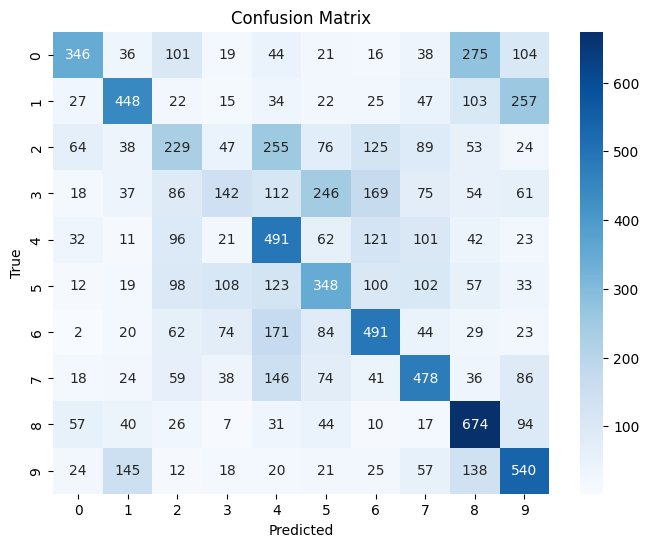

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Lenet


In [57]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np

In [58]:
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.19.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [59]:
# 1) Load CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 2) Preprocess: normalize to [0,1], one-hot labels
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)

In [61]:
# Optional: hold out a validation split from training
val_split = 0.1
val_count = int(len(x_train) * val_split)
x_val = x_train[:val_count]
y_val = y_train_cat[:val_count]
x_train2 = x_train[val_count:]
y_train2 = y_train_cat[val_count:]

print("Train:", x_train2.shape, y_train2.shape, "Val:", x_val.shape, y_val.shape, "Test:", x_test.shape)

Train: (45000, 32, 32, 3) (45000, 10) Val: (5000, 32, 32, 3) (5000, 10) Test: (10000, 32, 32, 3)


In [62]:
# 3) Define LeNet-like model adapted to 3-channel inputs
def build_lenet(input_shape=(32,32,3), num_classes=10):
    model = models.Sequential(name="LeNet_CIFAR10")
    # C1 - conv
    model.add(layers.Conv2D(6, kernel_size=(5,5), activation='tanh', input_shape=input_shape, padding='same'))
    model.add(layers.AveragePooling2D(pool_size=(2,2), strides=2))  # S2
    # C3
    model.add(layers.Conv2D(16, kernel_size=(5,5), activation='tanh', padding='valid'))
    model.add(layers.AveragePooling2D(pool_size=(2,2), strides=2))
    # Adaptation: add another conv block to increase capacity for CIFAR
    model.add(layers.Conv2D(120, kernel_size=(5,5), activation='tanh', padding='valid'))
    model.add(layers.Flatten())
    # FC layers
    model.add(layers.Dense(84, activation='tanh'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

model = build_lenet()
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "LeNet_CIFAR10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 16, 16, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 6, 6, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 2, 2, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 84)             │        40,404 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,246 (360.34 KB)

 Trainable params: 92,246 (360.34 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# 4) Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [64]:
# 5) Callbacks
checkpoint_path = "lenet_cifar10_best.h5"
callbacks = [
    EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True)
]


In [65]:
# 6) (Optional) Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.08,
    height_shift_range=0.08,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train2)

In [72]:
import math

batch_size = 128
epochs = 20

checkpoint_path = "lenet_cifar10_best.keras"

callbacks = [
    EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
    ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True)
]

steps_per_epoch = math.ceil(len(x_train2) / batch_size)

history = model.fit(
    datagen.flow(x_train2, y_train2, batch_size=batch_size, shuffle=True),
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
    verbose=2
)



Epoch 1/20
352/352 - 27s - 78ms/step - accuracy: 0.4746 - loss: 1.4780 - val_accuracy: 0.5072 - val_loss: 1.4052
Epoch 2/20
352/352 - 22s - 62ms/step - accuracy: 0.4877 - loss: 1.4431 - val_accuracy: 0.5148 - val_loss: 1.3818
Epoch 3/20
352/352 - 23s - 64ms/step - accuracy: 0.4967 - loss: 1.4215 - val_accuracy: 0.5212 - val_loss: 1.3709
Epoch 4/20
352/352 - 23s - 64ms/step - accuracy: 0.5028 - loss: 1.3992 - val_accuracy: 0.5322 - val_loss: 1.3418
Epoch 5/20
352/352 - 23s - 64ms/step - accuracy: 0.5075 - loss: 1.3843 - val_accuracy: 0.5398 - val_loss: 1.3355
Epoch 6/20
352/352 - 41s - 116ms/step - accuracy: 0.5154 - loss: 1.3629 - val_accuracy: 0.5448 - val_loss: 1.3254
Epoch 7/20
352/352 - 23s - 64ms/step - accuracy: 0.5216 - loss: 1.3502 - val_accuracy: 0.5532 - val_loss: 1.3001
Epoch 8/20
352/352 - 22s - 63ms/step - accuracy: 0.5268 - loss: 1.3332 - val_accuracy: 0.5466 - val_loss: 1.3185
Epoch 9/20
352/352 - 22s - 62ms/step - accuracy: 0.5328 - loss: 1.3149 - val_accuracy: 0.5572 -

In [73]:
# 8) Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=2)
print(f"Test loss: {test_loss:.4f}  Test accuracy: {test_acc:.4f}")


313/313 - 2s - 8ms/step - accuracy: 0.5751 - loss: 1.2070
Test loss: 1.2070  Test accuracy: 0.5751


In [80]:
# 9) Sample predictions (show first 10)
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
preds = model.predict(x_test[:10])
pred_labels = np.argmax(preds, axis=1)
true_labels = y_test[:10].flatten()
for i in range(10):
    print(f"Sample {i}: true={class_names[true_labels[i]]:10s}  pred={class_names[pred_labels[i]]:10s}  prob={np.max(preds[i]):.3f}")

# 10) Save the final model
model.save("lenet_cifar10_final.h5")
print("Saved model to lenet_cifar10_final.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step


Sample 0: true=cat         pred=cat         prob=0.575
Sample 1: true=ship        pred=truck       prob=0.815
Sample 2: true=ship        pred=automobile  prob=0.506
Sample 3: true=airplane    pred=airplane    prob=0.483
Sample 4: true=frog        pred=deer        prob=0.590
Sample 5: true=frog        pred=frog        prob=0.655
Sample 6: true=automobile  pred=automobile  prob=0.638
Sample 7: true=frog        pred=frog        prob=0.947
Sample 8: true=cat         pred=dog         prob=0.497
Sample 9: true=automobile  pred=automobile  prob=0.638
Saved model to lenet_cifar10_final.h5


Using existing test data from notebook memory.
Using existing y_probs from memory.

Overall metrics:
  Accuracy    : 0.5751
  F1 (macro)  : 0.5734
  F1 (micro)  : 0.5751
  F1 (weighted): 0.5734

Per-class metrics (sorted by F1):


,class,precision,recall,f1,support
0,automobile,0.6951,0.6590,0.6766,1000
1,ship,0.6907,0.6320,0.6601,1000
2,airplane,0.6200,0.6640,0.6412,1000
3,frog,0.6166,0.6610,0.6380,1000
4,truck,0.5690,0.6800,0.6196,1000
5,horse,0.5876,0.6440,0.6145,1000
6,deer,0.5552,0.4580,0.5019,1000
7,dog,0.4939,0.4870,0.4904,1000
8,bird,0.5033,0.4540,0.4774,1000
9,cat,0.4162,0.4120,0.4141,1000


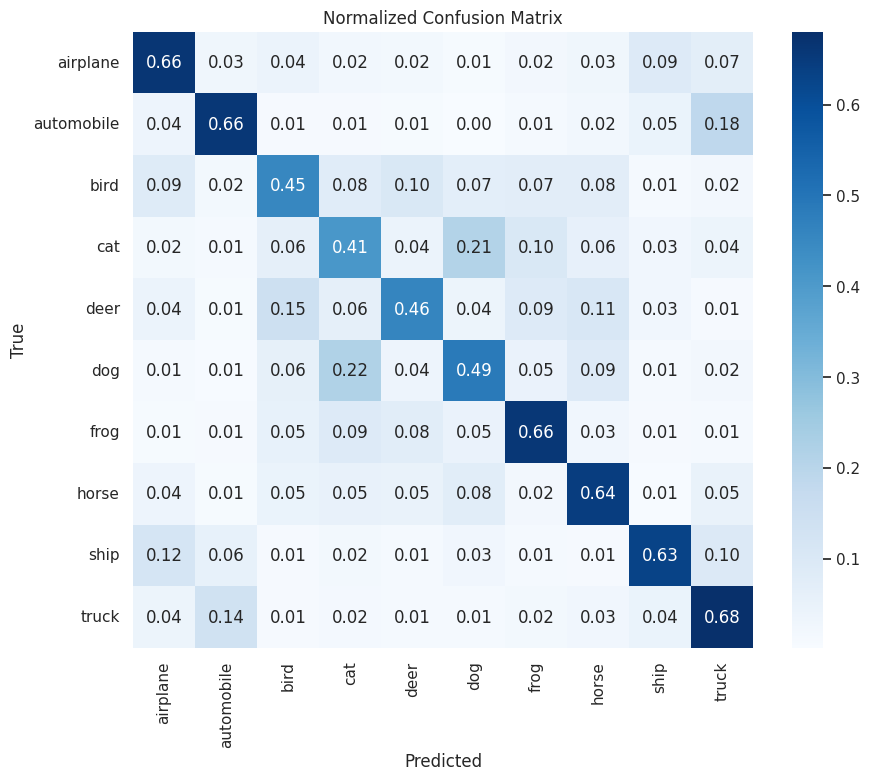

Saved predictions + probs CSV to: /mnt/data/predictions_posteval.csv

Top confusion pairs (true -> predicted) with counts:
  dog -> cat : 217
  cat -> dog : 213
  automobile -> truck : 185

Showing examples for top confusion pairs:


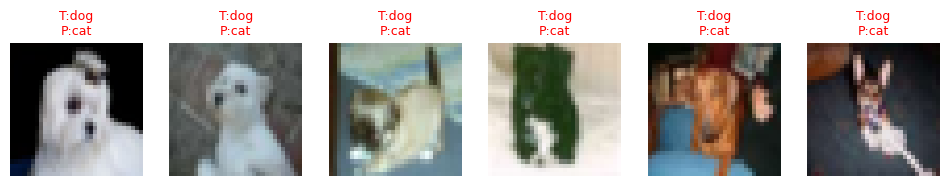

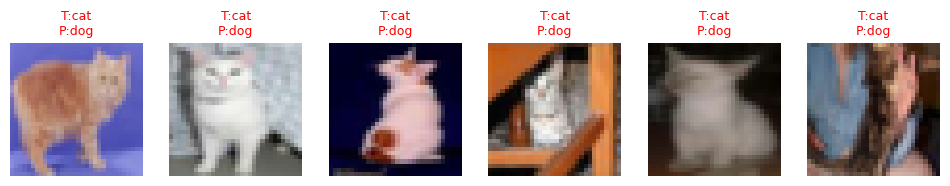

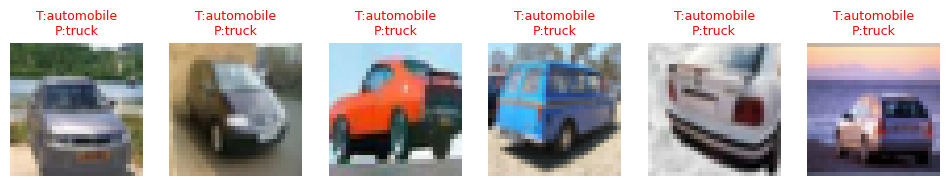


Recommendations:
- Look at classes with low F1 in the table above; consider targeted augmentation or more samples.
- For high confusion pairs, try targeted augmentation (zoom/shift/flip) or oversampling those true classes.
- If many classes underperform overall, try a stronger architecture (small ResNet/MobileNet) or longer training with LR schedule.
- Save the CSV for offline analysis; you can inspect top-3 probs to find ambiguous examples.

After-evaluation analysis complete.


In [82]:
# ===== After-evaluation analysis cell (single runnable block) =====
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_recall_fscore_support,
                             confusion_matrix, classification_report, f1_score)
import tensorflow as tf

sns.set()  # nicer plots

# CIFAR-10 class names
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# --- 0) Ensure test data exists ---
if 'x_test' not in globals() or 'y_test_cat' not in globals() or 'y_test' not in globals():
    print("Loading CIFAR-10 test data as fallback...")
    (Xtr, Ytr), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    x_test = x_test.astype('float32') / 255.0
    from tensorflow.keras.utils import to_categorical
    y_test_cat = to_categorical(y_test, 10)
else:
    print("Using existing test data from notebook memory.")

# --- 1) Ensure we have a model object (eval_model or model) ---
eval_model_obj = None
if 'eval_model' in globals():
    eval_model_obj = eval_model
elif 'model' in globals():
    eval_model_obj = model
else:
    # try to load saved checkpoints
    if os.path.exists("lenet_improved_best.keras"):
        eval_model_obj = tf.keras.models.load_model("lenet_improved_best.keras")
        print("Loaded lenet_improved_best.keras")
    elif os.path.exists("lenet_improved_final.keras"):
        eval_model_obj = tf.keras.models.load_model("lenet_improved_final.keras")
        print("Loaded lenet_improved_final.keras")
    elif os.path.exists("lenet_cifar10_final.h5"):
        eval_model_obj = tf.keras.models.load_model("lenet_cifar10_final.h5")
        print("Loaded lenet_cifar10_final.h5")
    else:
        raise RuntimeError("No model found in memory or files. Run training or ensure a saved model exists.")

# --- 2) Ensure predictions exist: compute if not present ---
if 'y_probs' not in globals():
    print("Computing predictions (y_probs) on x_test...")
    y_probs = eval_model_obj.predict(x_test, batch_size=256, verbose=1)
else:
    print("Using existing y_probs from memory.")

# Convert to class labels
y_pred = np.argmax(y_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# --- 3) Overall metrics ---
acc = accuracy_score(y_true, y_pred)
f1_macro = f1_score(y_true, y_pred, average='macro', zero_division=0)
f1_micro = f1_score(y_true, y_pred, average='micro', zero_division=0)
f1_weighted = f1_score(y_true, y_pred, average='weighted', zero_division=0)

print(f"\nOverall metrics:\n  Accuracy    : {acc:.4f}")
print(f"  F1 (macro)  : {f1_macro:.4f}")
print(f"  F1 (micro)  : {f1_micro:.4f}")
print(f"  F1 (weighted): {f1_weighted:.4f}\n")

# --- 4) Per-class precision/recall/f1 table ---
precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, zero_division=0)
df_metrics = pd.DataFrame({
    'class': class_names,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'support': support
}).sort_values('f1', ascending=False).reset_index(drop=True)

print("Per-class metrics (sorted by F1):")
display(df_metrics.style.format({'precision':'{:.4f}','recall':'{:.4f}','f1':'{:.4f}','support':'{:.0f}'}))

# --- 5) Normalized confusion matrix ---
cm = confusion_matrix(y_true, y_pred)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-12)  # avoid div0
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Normalized Confusion Matrix')
plt.show()

# --- 6) Save predictions + top-3 probs to CSV ---
probs_cols = [f'prob_{c}' for c in class_names]
probs_df = pd.DataFrame(y_probs, columns=probs_cols)
out_df = pd.DataFrame({
    'index': np.arange(len(x_test)),
    'true_label_idx': y_true,
    'true_label': [class_names[i] for i in y_true],
    'pred_label_idx': y_pred,
    'pred_label': [class_names[i] for i in y_pred],
    'pred_confidence': np.max(y_probs, axis=1)
})
# add top-3 probabilities and classes
top3_idx = np.argsort(y_probs, axis=1)[:, ::-1][:, :3]
out_df['top1_class'] = [class_names[i[0]] for i in top3_idx]
out_df['top2_class'] = [class_names[i[1]] for i in top3_idx]
out_df['top3_class'] = [class_names[i[2]] for i in top3_idx]
out_df = pd.concat([out_df, probs_df], axis=1)

csv_path = "/mnt/data/predictions_posteval.csv"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(csv_path), exist_ok=True)

out_df.to_csv(csv_path, index=False)
print(f"Saved predictions + probs CSV to: {csv_path}")

# --- 7) Top confusion pairs and show misclassified examples ---
cm_off = cm.copy()
np.fill_diagonal(cm_off, 0)
pairs = []
for i in range(len(class_names)):
    for j in range(len(class_names)):
        if i!=j and cm_off[i,j] > 0:
            pairs.append(((i,j), int(cm_off[i,j])))
pairs = sorted(pairs, key=lambda x: x[1], reverse=True)
top_pairs = pairs[:3]

print("\nTop confusion pairs (true -> predicted) with counts:")
for (t,p),cnt in top_pairs:
    print(f"  {class_names[t]} -> {class_names[p]} : {cnt}")

def show_misclassified(true_idx, pred_idx, max_examples=6):
    idxs = np.where((y_true==true_idx) & (y_pred==pred_idx))[0]
    if len(idxs)==0:
        print(f"No examples for {class_names[true_idx]} -> {class_names[pred_idx]}")
        return
    chosen = np.random.choice(idxs, min(max_examples, len(idxs)), replace=False)
    plt.figure(figsize=(min(6,len(chosen))*2,3))
    for k, ix in enumerate(chosen):
        ax = plt.subplot(1, len(chosen), k+1)
        plt.imshow(x_test[ix])
        plt.axis('off')
        ax.set_title(f"T:{class_names[true_idx]}\nP:{class_names[pred_idx]}", color='red', fontsize=9)
    plt.show()

print("\nShowing examples for top confusion pairs:")
for (t,p),cnt in top_pairs:
    show_misclassified(t, p, max_examples=6)

# --- 8) Quick recommendations printed ---
print("\nRecommendations:")
print("- Look at classes with low F1 in the table above; consider targeted augmentation or more samples.")
print("- For high confusion pairs, try targeted augmentation (zoom/shift/flip) or oversampling those true classes.")
print("- If many classes underperform overall, try a stronger architecture (small ResNet/MobileNet) or longer training with LR schedule.")
print("- Save the CSV for offline analysis; you can inspect top-3 probs to find ambiguous examples.")

print("\nAfter-evaluation analysis complete.")

In [84]:
# -------- Test Accuracy + F1 Score --------
import numpy as np
from sklearn.metrics import f1_score, accuracy_score
import tensorflow as tf

# Use eval_model if exists, otherwise fall back to model
mdl = eval_model if 'eval_model' in globals() else model

# Predict on test set
y_probs = mdl.predict(x_test, batch_size=256, verbose=1)

# Convert probabilities to class labels
y_pred = np.argmax(y_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Test accuracy
test_acc = accuracy_score(y_true, y_pred)
print(f"\nTest Accuracy: {test_acc:.4f}")

# F1 scores
f1 = f1_score(y_true, y_pred, average='macro')
print(f"F1 Score: {f1:.4f}")


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Test Accuracy: 0.5751
F1 Score: 0.5734


In [85]:
from sklearn.metrics import roc_auc_score

# ----- MULTICLASS AUC -----
auc_score = roc_auc_score(y_test_cat, y_probs, multi_class='ovr')
print(f"AUC Score: {auc_score:.4f}")


AUC Score: 0.9145


ResNet50



In [56]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
num_of_classes = 10


resnet_model = models.Sequential()
resnet_model.add(layers.UpSampling2D((2,2)))
resnet_model.add(layers.UpSampling2D((2,2)))
resnet_model.add(layers.UpSampling2D((2,2)))
resnet_model.add(convolutional_base)
resnet_model.add(layers.Flatten())
resnet_model.add(layers.BatchNormalization())
resnet_model.add(layers.Dense(128, activation='relu'))
resnet_model.add(layers.Dropout(0.5))
resnet_model.add(layers.BatchNormalization())
resnet_model.add(layers.Dense(64, activation='relu'))
resnet_model.add(layers.Dropout(0.5))
resnet_model.add(layers.BatchNormalization())
resnet_model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
resnet_model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = resnet_model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20)

Epoch 1/20
 108/1125 ━━━━━━━━━━━━━━━━━━━━ 9:10:55 33s/step - acc: 0.1470 - loss: 2.7553

In [ ]:
loss, accuracy = resnet_model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 115ms/step - acc: 0.9374 - loss: 0.2697
Test Accuracy = 0.9394000172615051


In [ ]:
y_pred = resmet_model.predict(x_test)
y_pred_labels = y_pred.argmax(axis=1)     # convert probabilities → labels
y_true = y_test.flatten()                 # convert shape (10000,1) → (10000,)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
print(resnet_model)

<Sequential name=sequential_1, built=True>


In [ ]:
[x for x in globals().keys() if "res" in x.lower()]


[]

In [ ]:
from sklearn.metrics import f1_score

f1_macro = f1_score(y_true, y_pred_labels, average='macro')
f1_weighted = f1_score(y_true, y_pred_labels, average='weighted')

print("F1 Score (Macro):", f1_macro)
print("F1 Score (Weighted):", f1_weighted)


F1 Score (Macro): 0.4103785212032335
F1 Score (Weighted): 0.4103785212032335


In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np

# One-hot encode true labels
from tensorflow.keras.utils import to_categorical
y_true_onehot = to_categorical(y_true, num_classes=10)

auc_score = roc_auc_score(y_true_onehot, y_pred, multi_class='ovr')
print("AUC Score (OvR):", auc_score)



AUC Score (OvR): 0.8402666111111111


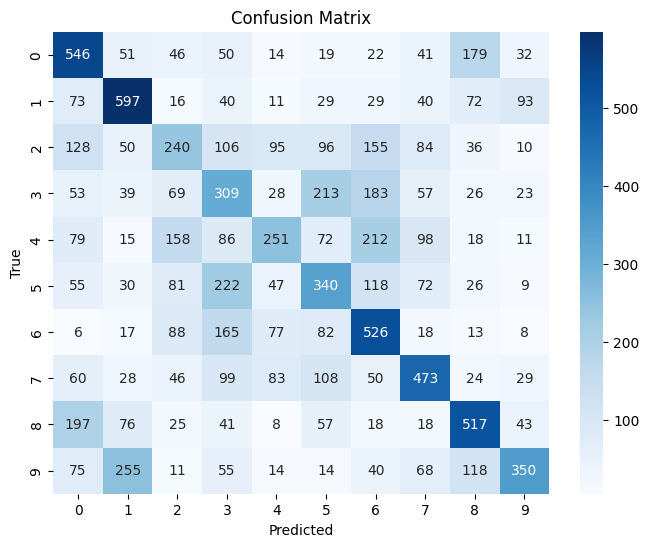

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


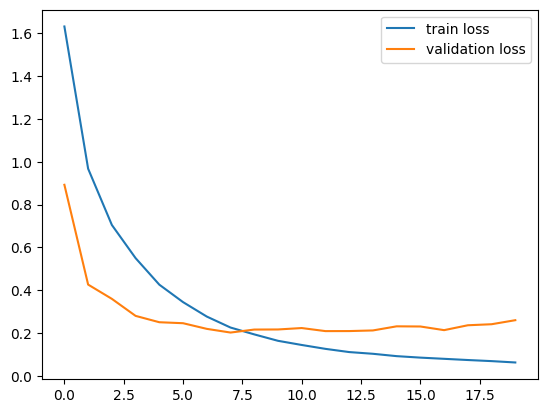

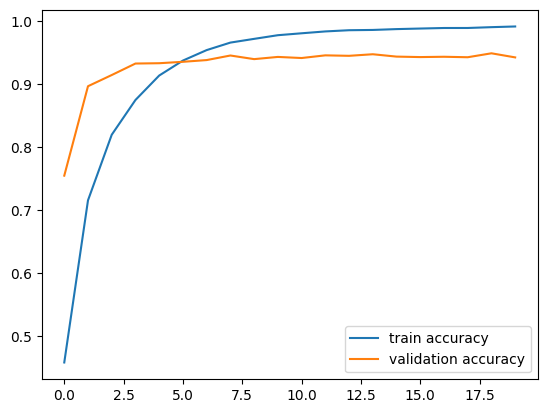

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()